In [9]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import h3pandas
import pandas as pd

In [2]:
gdf = gpd.read_parquet('/gpfs/data1/vclgp/xiongl/MatheusWork/result/gedi_amazon.parquet')
gdfh3 = gdf.h3.geo_to_h3(13)
gdfh3.head()

,rh_098,lon_lowestmode,lat_lowestmode,shot_number,quality_flag,geometry
h3_13,,,,,,
8d8a0cb64996aff,22.580000,-65.126661,-6.676386,111730300400242382,True,POINT (-65.12666 -6.67639)
8d8a0cb64d628bf,25.559999,-65.125328,-6.675954,57131100400242443,True,POINT (-65.12533 -6.67595)
8d8a0cb64d630bf,31.480000,-65.125630,-6.675534,57131100400242442,True,POINT (-65.12563 -6.67553)
8d8a0cb648aeabf,19.820000,-65.128770,-6.673458,111730300400242375,True,POINT (-65.12877 -6.67346)
8d8a0cb64c0353f,17.270000,-65.122312,-6.673069,111730200400247690,True,POINT (-65.12231 -6.67307)


In [3]:
# Identify rows with duplicated index
duplicated_rows = gdfh3.index.duplicated(keep=False)
# Select rows with duplicated index
result_df = gdfh3[duplicated_rows]
result_df

,rh_098,lon_lowestmode,lat_lowestmode,shot_number,quality_flag,geometry
h3_13,,,,,,
8d8a0cb448193bf,26.240000,-65.108691,-6.617727,146040600400796512,True,POINT (-65.10869 -6.61773)
8d8a0cb448193bf,25.469999,-65.108674,-6.617703,187750600100244674,True,POINT (-65.10867 -6.61770)
8d8a0cb4094bd7f,31.940001,-65.110884,-6.596632,146041100400240911,True,POINT (-65.11088 -6.59663)
8d8a0cb4094bd7f,29.320000,-65.110885,-6.596617,121721100100059955,True,POINT (-65.11088 -6.59662)
8d8a0cb41d2283f,26.809999,-65.117806,-6.586974,146041100400240888,True,POINT (-65.11781 -6.58697)
...,...,...,...,...,...,...
8d8aa869138657f,31.049999,-58.649801,-4.079779,98080600100243441,True,POINT (-58.64980 -4.07978)
8d8aa869139567f,88.059998,-58.649477,-4.079400,178900500100073209,True,POINT (-58.64948 -4.07940)
8d8aa869139567f,25.799999,-58.649503,-4.079358,98080600100243442,True,POINT (-58.64950 -4.07936)


In [ ]:
len(result_df)

In [ ]:
import pandas as pd
# Assuming result_df is your DataFrame with duplicated indices
# Use the previous example code to get result_df
# Group by index and calculate the difference between max and min in each group
grouped_result = result_df.groupby(result_df.index)['rh_098'].agg(lambda x: x.max() - x.min())
# Display the result
grouped_result

In [ ]:
len(grouped_result)

In [20]:
# merge parquet files 
    # Record the start time
import pyarrow.parquet as pq
import glob
import time
import argparse
import os
start_time = time.time()
files = glob.glob('/gpfs/data1/vclgp/xiongl/MatheusWork/result/gedi_amazon_2019/*.parquet')
print('Number of files:',len(files))
out_parquet='/gpfs/data1/vclgp/xiongl/MatheusWork/result/gedi_amazon_2019.parquet'
schema = pq.ParquetFile(files[0]).schema_arrow
with pq.ParquetWriter(out_parquet, schema=schema) as writer:
    for file in files:
        writer.write_table(pq.read_table(file, schema=schema))
# Record the end time
end_time = time.time()
# Calculate the running time
running_time = end_time - start_time
print(f"Running time: {running_time} seconds")

Number of files: 92
Running time: 21.610196113586426 seconds


In [21]:
df1= gpd.read_parquet('/gpfs/data1/vclgp/xiongl/MatheusWork/result/gedi_amazon_2019.parquet')
df2= gpd.read_parquet('/gpfs/data1/vclgp/xiongl/MatheusWork/result/gedi_amazon_2022.parquet')

In [23]:
df1.head()

,rh_098,rh_090,rh_080,rh_070,rh_060,rh_050,elev_lowestmode,geolocation/elev_highestreturn_a1,lon_lowestmode,lat_lowestmode,delta_time,shot_number,quality_flag,geometry
h3_12,,,,,,,,,,,,,,
8c8a0cc03d94dff,25.879999,23.450001,21.840000,20.219999,18.540001,16.850000,63.899075,92.482872,-64.314695,-6.797325,4.693665e+07,30651100100059972,True,POINT (-64.31470 -6.79732)
8c8a0cc03d963ff,26.330000,23.780001,22.139999,20.820000,19.480000,17.940001,64.366638,93.812004,-64.314397,-6.796905,4.693665e+07,30651100100059973,True,POINT (-64.31440 -6.79690)
8c8a0cc03d925ff,20.370001,16.780001,14.380000,11.760000,8.870000,5.580000,68.062813,91.664162,-64.314098,-6.796484,4.693665e+07,30651100100059974,True,POINT (-64.31410 -6.79648)
8c8a0cc0236edff,18.580000,13.890000,7.900000,4.640000,3.030000,1.760000,66.394012,88.047455,-64.313799,-6.796067,4.693665e+07,30651100100059975,True,POINT (-64.31380 -6.79607)
8c8a0cc023451ff,23.450001,21.010000,19.330000,16.820000,6.850000,3.370000,64.666313,90.627846,-64.313501,-6.795646,4.693665e+07,30651100100059976,True,POINT (-64.31350 -6.79565)


In [25]:
df1r13 = df1.h3.geo_to_h3(13)
df2r13 = df2.h3.geo_to_h3(13)
df1r13.head()

,rh_098,rh_090,rh_080,rh_070,rh_060,rh_050,elev_lowestmode,geolocation/elev_highestreturn_a1,lon_lowestmode,lat_lowestmode,delta_time,shot_number,quality_flag,geometry
h3_13,,,,,,,,,,,,,,
8d8a0cc03d948bf,25.879999,23.450001,21.840000,20.219999,18.540001,16.850000,63.899075,92.482872,-64.314695,-6.797325,4.693665e+07,30651100100059972,True,POINT (-64.31470 -6.79732)
8d8a0cc03d963bf,26.330000,23.780001,22.139999,20.820000,19.480000,17.940001,64.366638,93.812004,-64.314397,-6.796905,4.693665e+07,30651100100059973,True,POINT (-64.31440 -6.79690)
8d8a0cc03d924bf,20.370001,16.780001,14.380000,11.760000,8.870000,5.580000,68.062813,91.664162,-64.314098,-6.796484,4.693665e+07,30651100100059974,True,POINT (-64.31410 -6.79648)
8d8a0cc0236ed3f,18.580000,13.890000,7.900000,4.640000,3.030000,1.760000,66.394012,88.047455,-64.313799,-6.796067,4.693665e+07,30651100100059975,True,POINT (-64.31380 -6.79607)
8d8a0cc0234503f,23.450001,21.010000,19.330000,16.820000,6.850000,3.370000,64.666313,90.627846,-64.313501,-6.795646,4.693665e+07,30651100100059976,True,POINT (-64.31350 -6.79565)


In [7]:
print(len(df1r13))
# group by h3_13
# df_2019 = df1r13['rh_098'].groupby(df1r13.index).mean()
# df_2022 = df2r13['rh_098'].groupby(df2r13.index).mean()
# result = pd.merge(df_2019, df_2022, left_index=True, right_index=True)
# len(result)

2732823


In [26]:
result = pd.merge(df1r13, df2r13, left_index=True, right_index=True)
len(result)

4049

In [73]:
result['growth'] = result['rh_098_y'] - result['rh_098_x']
result['diff_x'] = (result['rh_098_x'] - result['rh_090_x'])/ result['rh_090_x'] * 100
result['diff_y'] = (result['rh_098_y'] - result['rh_090_y'])/ result['rh_090_y'] * 100
result['percent'] =  result['growth']/ result['rh_098_x'] * 100
result['decrease_flag_50'] = result['percent'] < -50
die = result[(result['percent'] < -50 ) & (result['diff_x'] < 80 ) & (result['diff_y'] < 80)]

<Axes: >

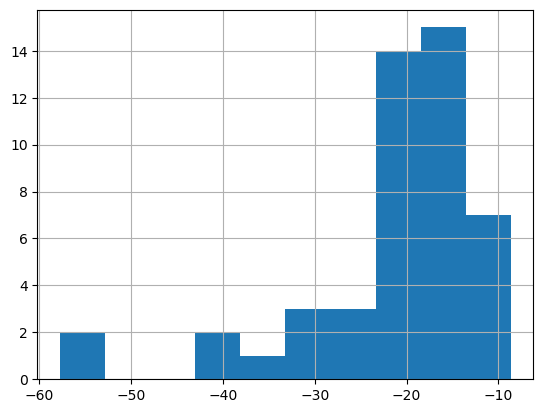

In [74]:
die['growth'].hist(bins=10)

In [75]:
len(die)

47

In [76]:
die.loc[:, 'diff_ele'] = abs(die['elev_lowestmode_x'] - die['elev_lowestmode_y'])

/gpfs/data1/vclgp/xiongl/env/linpy/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [77]:
last  = die[die['diff_ele'] < 5]
last

,rh_098_x,rh_090_x,rh_080_x,rh_070_x,rh_060_x,rh_050_x,elev_lowestmode_x,geolocation/elev_highestreturn_a1_x,lon_lowestmode_x,lat_lowestmode_x,...,quality_flag_y,geometry_y,growth,percent,decrease_flag_50,growth_090,percent_090,diff_x,diff_y,diff_ele
h3_13,,,,,,,,,,,,,,,,,,,,,
8d8a1852601e9bf,58.900002,35.200001,23.590000,22.309999,20.780001,19.059999,44.330647,105.933434,-61.388827,-5.173724,...,True,POINT (-61.38882 -5.17373),-36.160004,-61.392193,True,-14.320002,-40.681820,67.329544,8.908049,2.392593
8d8aa126909a2ff,57.389999,43.490002,27.940001,24.080000,22.020000,20.260000,77.796486,137.996399,-58.564384,-5.889931,...,True,POINT (-58.56435 -5.88994),-32.360001,-56.386131,True,-20.110003,-46.240520,31.961363,7.057321,0.239151
8d8aa126979e07f,52.290001,39.820000,33.450001,31.760000,30.450001,28.910000,94.072746,151.049805,-58.561377,-5.885726,...,True,POINT (-58.56134 -5.88575),-28.420000,-54.350735,True,-17.600000,-44.198898,31.315926,7.425749,2.708931
8d8b590c8474cbf,31.500000,23.110001,4.720000,3.220000,2.210000,1.270000,199.008560,232.726044,-69.405931,-7.559255,...,True,POINT (-69.40596 -7.55927),-23.270000,-73.873016,True,-18.170000,-78.623970,36.304626,66.599182,0.704956


In [41]:
#die.to_parquet('die_r13.parquet')

In [14]:
for index, row in die[:2].iterrows():
    shots_in = gdfh3.loc[index]
    print(shots_in .head())

                 rh_098  lon_lowestmode  lat_lowestmode         shot_number  \
h3_13                                                                         
8d8a03ab1916b3f   10.55      -62.996739       -6.644169  200260800100063425   
8d8a03ab1916b3f   30.26      -62.996771       -6.644162   19421100400244745   

                 quality_flag                    geometry  
h3_13                                                      
8d8a03ab1916b3f          True  POINT (-62.99674 -6.64417)  
8d8a03ab1916b3f          True  POINT (-62.99677 -6.64416)  
                    rh_098  lon_lowestmode  lat_lowestmode  \
h3_13                                                        
8d8a08245ae0bbf  12.410000      -64.910455       -4.944558   
8d8a08245ae0bbf  25.809999      -64.910456       -4.944548   

                        shot_number  quality_flag                    geometry  
h3_13                                                                          
8d8a08245ae0bbf  21590110040024574

In [78]:
for index, row in last.iterrows():
    shots_in = gdfh3.loc[index]
    for s_index, s_row in shots_in.iterrows():
            #print(s_index)
            # Constructing the command as a string
            command = f"shotnumber2wave.py {s_row['shot_number']} last {s_index} > processing.txt"
            print(command)
            # Running the command using the !python shell command
            !python {command}

shotnumber2wave.py 214220800400259478 last 8d8a1852601e9bf > processing.txt
shotnumber2wave.py 25990800400298774 last 8d8a1852601e9bf > processing.txt
shotnumber2wave.py 231081100100072038 last 8d8aa126909a2ff > processing.txt
shotnumber2wave.py 28511100100071613 last 8d8aa126909a2ff > processing.txt
shotnumber2wave.py 231081100100072048 last 8d8aa126979e07f > processing.txt
shotnumber2wave.py 28511100100071623 last 8d8aa126979e07f > processing.txt
shotnumber2wave.py 217200300100054768 last 8d8b590c8474cbf > processing.txt
shotnumber2wave.py 31110300100053822 last 8d8b590c8474cbf > processing.txt


### 